This jupyter notebook is prepared by [Chun-Kit Yeung](https://ckyeungac.com)

# Introduction
This tutorial proceeds from the previous tutorial in Numpy. In this tutorials, we are going to show you the general machine learning workflow using scikit-learn with an example of the iris classification problem.

Before dive into the details of scikit-learn, let me talk about what is the goal of iris classification problem. The goal of the iris classification problem is to find a machine learning model $h(\cdot)$ to predict whether a given sample $\mathbf{x}$ is an iris or not, i.e. $y \in \{0, 1, 2\}$, where the value indicates the type of iris (which will be explained later on).

Specifically, we are going to select a supervised machine learning model $h(\cdot)$ which maps an input sample $\mathbf{x} = (x_1, x_2, \dots, x_n)$ to an output $y$. That is $y = h(\mathbf{x})$ (you can view it as a math function.) Different machine learning algorithms have different approaches in finding such the model $h(\cdot)$. 

So, before starting any of the machine leanring project, it is very important to identify the features $\mathbf{x}$ that are being used, and the output label $y$ that we are going to predict.


First and foremost, let's import the packages required in this library.

In [7]:
import numpy as np
import sklearn 
import matplotlib
import matplotlib.pyplot as plt

# tell the jupyter notebook that plot the diagram directly in the output
%matplotlib inline 
    
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sklearn.__version__)
print ('matplotlib version:', matplotlib.__version__)

numpy version: 1.12.1
scikit-learn version: 0.18.1
matplotlib version: 2.0.2


In [8]:
def printsep():
    """
    A handy function to print out a separate line
    """
    print('='*30)

# Dataset
Scikit-learn includes a few well-known datasets. The Iris flower dataset includes information about 150 instances from three different Iris flower species, including sepal and petal length and width. The natural task to solve using this dataset is to learn to guess the Iris species knowing the sepal and petal measures.

In [9]:
from sklearn import datasets
iris = datasets.load_iris() # loading the iris dataset

In [10]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

As you can see, `iris` contains 5 "types" of data that we can access. Let me briefly explain them:
+ 'DESCR': it is the description of the dataset
+ 'data': it is the features of the dataset
+ 'feature_names': it is the name of the features
+ 'target': it is the output labels
+ 'target_names': it is the name of the output labels

In [11]:
X_iris = iris.data
y_iris = iris.target

In [12]:
type(X_iris) # the data is stored in an numpy array

numpy.ndarray

In [13]:
print('The shape of input features: {0}'.format(X_iris.shape))
print('The shape of output labels: {0}'.format(y_iris.shape))
printsep()
print('Feature names: {0}'.format(iris.feature_names))
print('First instance features: {0}'.format(X_iris[0]))
printsep()
print('Target classes: {0}'.format(iris.target_names))
print('Target classes values: {}'.format(set(iris.target)))

The shape of input features: (150, 4)
The shape of output labels: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First instance features: [ 5.1  3.5  1.4  0.2]
Target classes: ['setosa' 'versicolor' 'virginica']
Target classes values: {0, 1, 2}


The above code give you a brief understanding about the dataset.

`The shape of input features: (150, 4)` means that there are 150 samples and each with 4 features.

The namse of the four features are shown in `Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']`.

The output labels $y \in \{0, 1, 2\}$ each representing the type of iris - `['setosa' 'versicolor' 'virginica']`

**To better understand the data, we also visualize the features with diagram.**

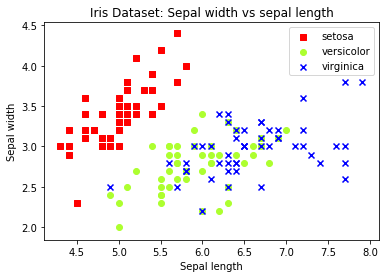

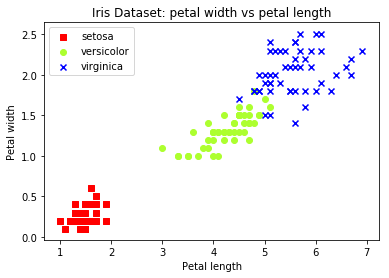

In [14]:
plt.figure('sepal')
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
for i in range(len(colormarkers)):
    px = X_iris[:, 0][y_iris == i]
    py = X_iris[:, 1][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: Sepal width vs sepal length')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.figure('petal')

for i in range(len(colormarkers)):
    px = X_iris[:, 2][y_iris == i]
    py = X_iris[:, 3][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: petal width vs petal length')
plt.legend(iris.target_names)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

# Prepare the training data and testing data
Now, the data is ready and we have a basic understanding about it. The second stage in machine learning is constructing a predictive model consists of training and testing. We'll use our data to train the model, and then we'll test the model to see how closely it is able to predict the label.

Yet, we only have one dataset, how could we have one dataset for training and one dataset for testing? So, our first step will be to separate the dataset into to separate sets, using 80% of the instances for training our classifier, and the remaining 20% for testing it. Scikit-learn provides a handy library in doing so:

```
train_test_split(*arrays, **options)
====
*arrays: 
    type: sequence of indexables with same length / shape[0]
    dscr: Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
test_size: 
    type: float, int, None, optional
    dscr: By default, the value is set to 0.25, indicating that 25% of the data used in the test set.
random_state: 
    type: int, RandomState instance or None, optional (default=None)
    dscr: If int, random_state is the seed used by the random number generator.
shuffle: 
    type: boolean, optional (default=True)
    dscr: Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
stratify: 
    type: array-like or None (default is None)
    dscr: If not None, data is split in a stratified fashion, using this as the class labels.
====
```

In [8]:
# Todo: import the library

In [9]:
# Todo: split the dataset

In [10]:
# Todo: print out the final shape of the train set and test set


((120, 4), (30, 4), (120,), (30,))

# Use Naive Bayes Classifier
We use the multinomial naive Bayes classifier from scikit-learn.

```
MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
====
alpha: 
    type: float, optional (default=1.0)
    dscr: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

fit_prior: 
    type: boolean, optional (default=True)
    dscr: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

class_prior: 
    type: array-like, size (n_classes,), optional (default=None)
    dscr: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
====
```


In [15]:
# Todo: import the naive Bayes classifier


In [ ]:
# Todo: instantiate the classifer


## Training

In [16]:
# Todo: call the fit() method to train the classifier


## Testing

We are going to test our model, the evaluation measure we used here is **accuracy**. Yet it is a multi-class problem, how do we going to find the accuracy?

In [17]:
def accuracy(y_true, y_pred):
    """
    This function return the accuracy score.
    
    :type y_true: list, list of ground true labels
    :type y_pred: list, list of predicted labels
    :rtype: float, accuracy score of the model
    """
    acc = None
    
    # Todo: implement the function to find the accuracy
    
    return acc

In [19]:
# Todo: find the accuracy for the training set


In [ ]:
# Todo: find the accuracy for the test set


# Take home exercise
Implement naive Bayes yourself to get the prior, likelihood, and posterior probablities.

Below is a template for you to work on:)

In [50]:
from collections import Counter

class NaiveBayes(object):
    def __init__(self, X, y, feature_names=None, target_names_dict=None):
        """
        It is the constructor for the class object in python.
        :type X: numpy 2d-array
        :type y: numpy 1d-array
        :features_name: list, the features name for X
        :target_names_dict: dict, the mapping from value in y to the target name
        """
        # assure the input is valid
        # assert <condition>, <the message that going to print out when the condition is False>
        assert (type(X) == np.ndarray and X.ndim == 2), "the input 'X' is not in a 2d array"
        assert (len(feature_names) == X.shape[1]), "the number of features in 'features_name' and 'X' does not match"
        # You can add more assertion, but here we assume the user won't make mistake
        
        self.X = X
        self.y = y
        
        self.feature_names = feature_names
        if feature_names is None:
            self.feature_names = [str(i) for i in range(X.shape[1])]
            
        self.target_names_dict = target_names_dict
        if target_names_dict is None or type(target_names_dict) is not dict:
            self.target_names_dict = dict()
    
    def calculate_prior(self):
        """
        This function will return the prior probability of each label
        
        :rtype: dict
        """
        num_samples = self.y.shape[0]
        
        # Using Counter to count the occurance of each value in y 
        # Convert it to dict for later calculation
        relative_occurences = dict(Counter(self.y))
        
        prior = dict()
        for key in relative_occurences.keys():
            # dict.get(a, b): if a is the key in dict, return dict[a], otherwise, return b
            label = self.target_names_dict.get(key, key)
            
            # find the prior for each label
            prior[label] = relative_occurences[key]/num_samples
            
        return prior
    
    def calculate_likelihood(self):
        # Todo
        pass
    
    def make_prediction(self, x):
        # Todo
        pass

In [54]:
# build the iris target name dict, dict[<label_value>] = <label_name>
iris_target_name_dict = dict()
iris_target_name_dict[0] = 'setosa'
iris_target_name_dict[1] = 'versicolor'
iris_target_name_dict[2] = 'virginica'

nb = NaiveBayes(
    X=X_iris, 
    y=y_iris, 
    feature_names=iris.feature_names, 
    target_names_dict=iris_target_name_dict)

In [55]:
nb.calculate_prior()

{'setosa': 0.3333333333333333,
 'versicolor': 0.3333333333333333,
 'virginica': 0.3333333333333333}

# Further Reading
1. Youtube video of [*The 7 Steps of Machine Learning*](https://www.youtube.com/watch?v=nKW8Ndu7Mjw)
2. Scikit-learn documentation of [*Naive Bayes*](http://scikit-learn.org/stable/modules/naive_bayes.html)